# BME-230A: Homework 2 Part A

Your assignment for homework 2A is to redo the linear regression analysis, but using a different classification method from SKLearn. 

Copy this notebook and complete the homework as an IPython notebook. Submit the notebook file to Canvas to complete the homework.

Use the same dataset:
https://drive.google.com/file/d/1FZbQCEHr2Rie4cXSM6Udg0SaWTtPnEHO/view?usp=sharing

Goals and Requirements:
1. Select a classification method from [SKLearn](http://scikit-learn.org/):
    * We recommend logistic regression or any forest method as they are fairly intuitive. Feel free to investigate a method for regularization of the model (preventing over training).

2. Write a short explanation of the method and how it works (look for explanations in documention, youtube, or online).

3. Try to achieve the highest accuracy / estimator quality.

*Notes*:

Use a reasonable train/test split of 80%/20% or even 70%/30% to avoid too much variance in your estimate of accuracy, FPR and TPR. 

## Method

Describe the method you have selected and give a short explanation of how it works. Feel free to include a textual description and any mathematics you feel relevant.


**What is the Logistic Regression Model?**

The Logistic Regression method is a classification method which is a linear model for classification. Using a logistic function, it models the possible outcomes of a single trial. 

**Why did I choose Logistic Regression?**

The reason why I chose this method was because of the simpleness of its implementation. 

# Your Code

Below include your code

*I worked on this assignment with Sahasra Shankar and Maheep Luthra*

**Loading and Preprocessing the Data:**

In [10]:
# Load the Data
import urllib.request
url = "https://raw.githubusercontent.com/benedictpaten/intro_python/main/lecture_notebooks/data/breast-cancer-wisconsin.data.csv"
data = 'data.csv'
urllib.request.urlretrieve(url, data) # This function copies the thing the url points at into a local copy

import numpy as np
import pandas as pd
df = pd.read_csv("data.csv")

#Preprocess the Data
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for col in df.columns: # For each column in the data frame
    df[col] = encoder.fit_transform(df[col]) # Transform the series so is zero based

**Logistic Regression - Variable Selection:**

In [11]:
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression

#Variable Selection
features = list(df.keys())
features.remove('id')
features.remove('class')

feature_scores = []

for feature in features:
    x = df[[feature]]
    y = df['class']
    lr_model = linear_model.LogisticRegression(penalty='l2',dual=False, tol=0.001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    lr_model.fit(x, y)
    feature_scores.append([feature, lr_model.score(x,y)])

feature_scores.sort(key=lambda x: x[1], reverse=True)
for feature_score in feature_scores:
    print(feature_score)

['uniformity-of-cell-size', 0.927038626609442]
['uniformity-of-cell-shape', 0.9227467811158798]
['bland-chromatin', 0.9070100143061517]
['single-epithelial-cell-size', 0.8755364806866953]
['normal-nucleoli', 0.8669527896995708]
['marginal-adhesion', 0.8640915593705293]
['clump-thickness', 0.8612303290414879]
['mitoses', 0.7896995708154506]
['bare-nuclei', 0.7138769670958512]


**Logistic Regression w/ Multiple Variables**

In [12]:
x = df[['uniformity-of-cell-shape','uniformity-of-cell-size']]
y = df['class']
lr_model = linear_model.LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
lr_model.fit(x, y)
print("Score: ", lr_model.score(x,y))

Score:  0.9456366237482118


# Classification
Create training/test splits and train the classifier. Report the accuracy, FPR and TPR.

**From Regression to Classification**

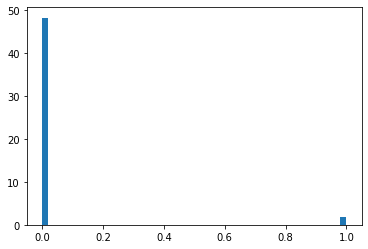

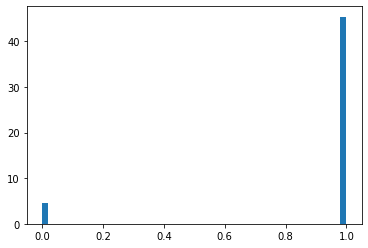

In [13]:
import matplotlib.pyplot as plt
input_0 = df.loc[df['class'] == 0]
y_0 = input_0['class']
x_0 = input_0[['uniformity-of-cell-shape','uniformity-of-cell-size']]

input_1 = df.loc[df['class'] == 1]
y_1 = input_1['class']
x_1 = input_1[['uniformity-of-cell-shape','uniformity-of-cell-size']]
preds_0 = lr_model.predict(x_0)
preds_1 = lr_model.predict(x_1)
n, bins, patches = plt.hist(preds_0, bins=50, density=1, cumulative=0)
plt.show()
n, bins, patches = plt.hist(preds_1, bins=50, density=1, cumulative=0)
plt.show()

**Accuracy**

In [14]:
# Accuracy 
y_pred = lr_model.predict(x)
y_pred = [1 if p > 0.9 else 0 for p in y_pred]
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9456366237482118

**Splitting the Dataset**

In [15]:
# Splitting the Dataset
# split into train and test data
from sklearn.model_selection import train_test_split

(train,test) = train_test_split(df, test_size=0.2)
train_output = train['class']
train_input = train[['uniformity-of-cell-shape','uniformity-of-cell-size']]

test_output = test['class']
test_input = test[['uniformity-of-cell-shape','uniformity-of-cell-size']]

lr_model.fit(train_input, train_output)
print("Score: ", lr_model.score(train_input, train_output))

Score:  0.9445438282647585


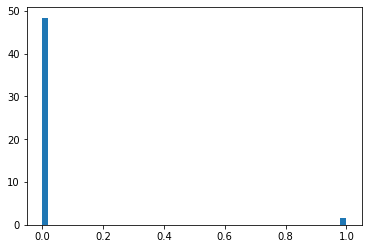

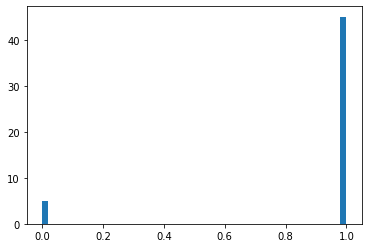

In [16]:
input_0 = train.loc[train['class'] == 0]
y_0 = input_0['class']
x_0 = input_0[['uniformity-of-cell-shape','uniformity-of-cell-size']]

input_1 = train.loc[train['class'] == 1]
y_1 = input_1['class']
x_1 = input_1[['uniformity-of-cell-shape','uniformity-of-cell-size']]
preds_0 = lr_model.predict(x_0)
preds_1 = lr_model.predict(x_1)
n, bins, patches = plt.hist(preds_0, bins=50, density=1, cumulative=0)
plt.show()
n, bins, patches = plt.hist(preds_1, bins=50, density=1, cumulative=0)
plt.show()

In [17]:
y_pred = lr_model.predict(test_input)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]
from sklearn.metrics import accuracy_score
accuracy_score(test_output, y_pred)

0.9214285714285714

**Decomposing Accuracy**

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_output, y_pred))

print("Accuracy: ", accuracy_score(test_output, y_pred))

tn, fp, fn, tp = confusion_matrix(test_output, y_pred).ravel()
fpr = fp * 1.0 / (fp+tn) # Fraction of true negative cases with a positive prediction
tpr = fn * 1.0 / (tp+fn) # Fraction of true positive cases with a negative prediction
print("FPR:", fpr)
print("TPR:", tpr)

[[87  3]
 [ 8 42]]
Accuracy:  0.9214285714285714
FPR: 0.03333333333333333
TPR: 0.16


# Questions
**What feature contributes most to the prediction? How can we tell?**

Answer: The uniformity of the cell shape and size contribute most to the prediction and both have an accuracy of approximately 92%. If you run .score on the columns, you can tell. 

**Explain in your own words the difference between regression and classification methods.**

Answer: The main difference between regression and classification method is what the predict. Classification predicts a dicrete class label while regression predicts a continuous quantity. In other words, in regression, the ouput could be any value between 0 and 1 which classification results in either 0 or 1, so it has a binary output. While there are some overlaps between the two methods, this is the general difference between the two. 

**Is it best to use all the features or exclude some? Why?**

Answer: Using all data features can be expensive and can increase processing time, and becuase of this it may be better to excluse some. Using all data features can overtrain data to the point where it could create outliers which could skew the data, and are essentially unnecessary in the long run. It is safer to utilize features that have the best impact on the data. 

**What methods can be used to prevent over-training? How would or did you apply these methods to create a robust model?**

Answer: Doing a test/train split of your data can allow for the prevention of over-training. I would do this by using model_selection.train_test_split() function and select a portion of data to test randomly with the other portion of data. 